In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wheat13 = pd.read_pickle('./data/185day_data13.df')

In [7]:
wheat13.groupby('Location').apply(lambda x: x.Date.max() - x.Date.min()).value_counts()

185 days    935
184 days      6
152 days      6
182 days      3
dtype: int64

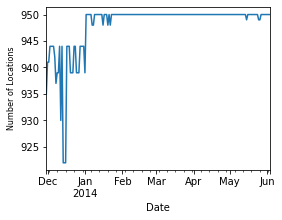

In [31]:
plt.figure(figsize=(4, 3))
wheat13.groupby('Date').Location.count().plot()
plt.ylabel('Number of Locations', fontsize=8)
plt.savefig('./figures/date&locations.png', dpi=600)